In [2]:
import ipywidgets as widgets
from IPython.display import display
def update_parameter(parameter_value):
    # 在这里执行代码，并使用 parameter_value 作为参数值
    # 例如，你可以将 parameter_value 用于某个函数或条件
    print("参数值已更新为:", parameter_value)

# 创建一个滑动条控件
parameter_slider = widgets.FloatSlider(
    value=1.0,  # 初始值
    min=0.0,    # 最小值
    max=10.0,   # 最大值
    step=0.1,   # 步进值
    description='参数：'
)

# 使用 interactive 函数将滑动条控件与函数关联起来
interactive_plot = widgets.interactive(update_parameter, parameter_value=parameter_slider)

# 显示滑动条
display(interactive_plot)



interactive(children=(FloatSlider(value=1.0, description='参数：', max=10.0), Output()), _dom_classes=('widget-in…

<function update_parameter at 0x00000283DB1CF880>


In [4]:
import ipywidgets as widgets
from IPython.display import display
# 定义paramter1和paramter2的初始值
initial_paramter1_value = 0.0
initial_paramter2_value = 0.0

# 创建滑动条控件用于paramter1
paramter1_slider = widgets.FloatSlider(
    value=initial_paramter1_value,
    min=0.0,
    max=100.0,
    step=0.1,
    description='参数paramter1：'
)

# 创建滑动条控件用于paramter2
paramter2_slider = widgets.FloatSlider(
    value=initial_paramter2_value,
    min=0.0,
    max=100.0,
    step=0.1,
    description='参数paramter2：'
)
def update_paramters(change):
    paramter1_value = paramter1_slider.value
    paramter2_value = paramter2_slider.value
    sum_paramters = paramter1_value + paramter2_value
    # 输出paramter1和paramter2的和
    print(f"参数paramter1的值：{paramter1_value}")
    print(f"参数paramter2的值：{paramter2_value}")
    print(f"paramter1 + paramter2 = {sum_paramters}")

# 将滑动条控件的值与函数绑定
paramter1_slider.observe(update_paramters, names='value')
paramter2_slider.observe(update_paramters, names='value')
display(paramter1_slider)
display(paramter2_slider)

FloatSlider(value=0.0, description='参数paramter1：')

FloatSlider(value=0.0, description='参数paramter2：')

In [5]:
paramter1_value


NameError: name 'paramter1_value' is not defined

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(paramter1, paramter2):
    print(f'paramter1: {paramter1}, paramter2: {paramter2}, sum: {paramter1 + paramter2}')
    return paramter1, paramter2

interactive_plot = interactive(f, paramter1=(0.0,10.0), paramter2=(0.0,10.0))
interactive_plot


interactive(children=(FloatSlider(value=5.0, description='paramter1', max=10.0), FloatSlider(value=5.0, descri…

In [8]:
paramter1, paramter2 = interactive_plot.result
print(f'paramter1: {paramter1}, paramter2: {paramter2}')


paramter1: 6.6, paramter2: 5.9


In [9]:
import math

def calculate_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def check_circles(line1, line2):
    # 计算线段的中点作为圆心
    c1 = [(line1[0][0]+line1[1][0])/2, (line1[0][1]+line1[1][1])/2]
    c2 = [(line2[0][0]+line2[1][0])/2, (line2[0][1]+line2[1][1])/2]

    # 计算线段的长度作为圆的直径，因此半径是长度的一半
    r1 = calculate_distance(line1[0], line1[1]) / 2
    r2 = calculate_distance(line2[0], line2[1]) / 2

    # 计算两个圆心之间的距离
    d = calculate_distance(c1, c2)

    # 判断两个圆的关系
    if d > r1 + r2:
        return "两个圆没有交点"
    elif d == r1 + r2:
        return "两个圆相切"
    elif d < r1 + r2:
        if d > abs(r1 - r2):
            return "两个圆相交"
        elif d == abs(r1 - r2):
            return "一个圆在另一个圆内相切"
        else:
            return "一个圆在另一个圆内且不相交"
    else:
        return "未知情况"

# 测试
line1 = [(0, 0), (2, 0)]
line2 = [(1, 0), (3, 0)]
print(check_circles(line1, line2))


两个圆相交


In [10]:
import numpy as np
import math

# 计算两点之间的距离
def calculate_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# 计算两线段的角度
def calculate_angle(p1, p2):
    return math.degrees(math.atan2(p2[1] - p1[1], p2[0] - p1[0]))

# 计算点到线段的最短距离
def point_to_line_distance(point, line):
    p1, p2 = line
    line_vector = np.array(p2) - np.array(p1)
    point_vector = np.array(point) - np.array(p1)
    line_length = np.linalg.norm(line_vector)
    unit_line_vector = line_vector / line_length
    projected_point_length = np.dot(point_vector, unit_line_vector)
    if projected_point_length < 0:
        return calculate_distance(point, p1)
    elif projected_point_length > line_length:
        return calculate_distance(point, p2)
    else:
        projected_point = p1 + projected_point_length * unit_line_vector
        return calculate_distance(point, projected_point)

# 判断两线段的一致性
def check_consistency(line1, line2):
    # 判断角度差
    angle1 = calculate_angle(*line1)
    angle2 = calculate_angle(*line2)
    if abs(angle1 - angle2) > 2:
        return False

    # 判断线段1上所有点到线段2的垂直距离
    for point in line1:
        if point_to_line_distance(point, line2) > 5:
            return False

    # 判断以线段为直径的圆的关系
    c1 = [(line1[0][0]+line1[1][0])/2, (line1[0][1]+line1[1][1])/2]
    c2 = [(line2[0][0]+line2[1][0])/2, (line2[0][1]+line2[1][1])/2]
    r1 = calculate_distance(line1[0], line1[1]) / 2
    r2 = calculate_distance(line2[0], line2[1]) / 2
    d = calculate_distance(c1, c2)
    if d > r1 + r2:
        return False

    return True

# 测试
line1 = [(0, 0), (2, 0)]
line2 = [(1, 0), (3, 0)]
print(check_consistency(line1, line2)) # 输出：True


True


In [11]:
def find_matching_lines(lines1, lines2):
    lines3 = []
    for line1 in lines1:
        for line2 in lines2:
            if check_consistency(line1, line2):
                lines3.append(line1)
                break
    return lines3

# 测试
lines1 = [[(0, 0), (2, 0)], [(0, 0), (0, 2)], [(0, 0), (-2, 0)]]
lines2 = [[(1, 0), (3, 0)], [(1, 1), (3, 1)], [(0, 0), (0, 2)]]
lines3 = find_matching_lines(lines1, lines2)
print(lines3)  # 输出：[[(0, 0), (2, 0)], [(0, 0), (0, 2)]]


[[(0, 0), (2, 0)], [(0, 0), (0, 2)]]


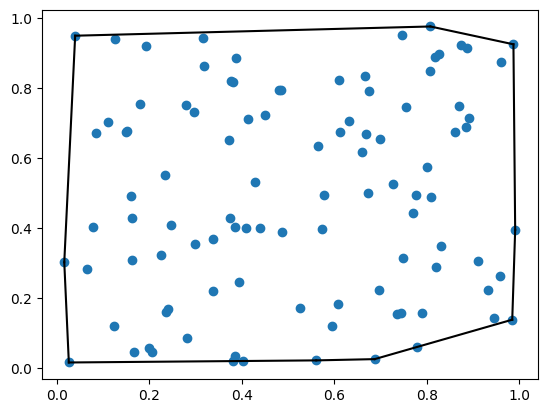

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# 生成100个随机点
points = np.random.rand(100, 2)

# 计算凸包
hull = ConvexHull(points)

# 绘制所有点
plt.scatter(points[:,0], points[:,1])

# 绘制凸包的边
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

plt.show()